In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.table import Table
t = Table.read('./chains/' + 'posteriors.dat', format='ascii')

In [3]:
# accidentally defined sigma wrong
t['col7'] = t['col7']**0.5
t['col8'] = t['col8']**0.5
t['col9'] = t['col9']**0.5

t['col10'] = t['col10']**0.5
t['col11'] = t['col11']**0.5
t['col12'] = t['col12']**0.5

t['col19'] = t['col19']**0.5
t['col20'] = t['col20']**0.5
t['col21'] = t['col21']**0.5

t['col22'] = t['col22']**0.5
t['col23'] = t['col23']**0.5
t['col24'] = t['col24']**0.5

In [4]:
mag_bins = np.array([-17,-18,-19,-20,-21,-22,-23])
mag_lims = mag_bins[:-1]
bin_centers = (mag_bins[:-1] + mag_bins[1:])/2.0

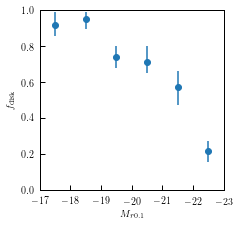

In [5]:
plt.figure(figsize=(3.3,3.3))
plt.errorbar(bin_centers, t['col25'],  [t['col25']-t['col26'],t['col27']-t['col25']], fmt='o')
plt.ylim([0,1])
plt.xlim([-17,-23])
plt.ylabel(r'$f_{\rm disk}$')
plt.xlabel(r'$M_{r0.1}$')

plt.show()

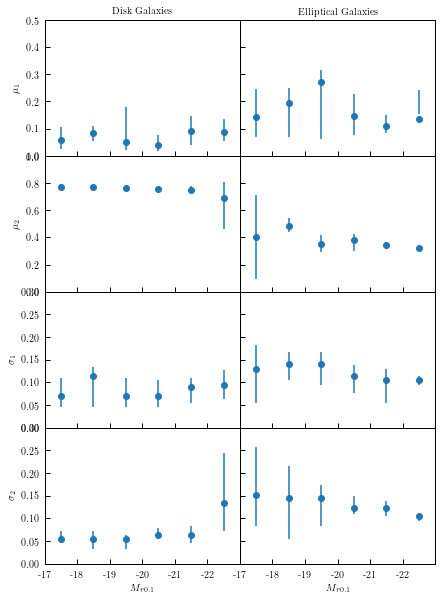

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(7.0,10.0), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

# column1
ax = axes[0,0]
ax.set_title('Disk Galaxies')
ax.errorbar(bin_centers, t['col1'], [t['col1']-t['col2'], t['col3']-t['col1']], fmt='o')
ax.set_ylim([0,0.5])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\mu_1$')

ax = axes[1,0]
ax.errorbar(bin_centers, t['col4'], [t['col4']-t['col5'], t['col6']-t['col4']], fmt='o')
ax.set_ylim([0,1])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\mu_2$')

ax = axes[2,0]
ax.errorbar(bin_centers, t['col7'], [t['col7']-t['col8'], t['col9']-t['col7']], fmt='o')
ax.set_ylim([0.0,.3])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\sigma_1$')

ax = axes[3,0]
ax.errorbar(bin_centers, t['col10'], [t['col10']-t['col11'], t['col12']-t['col10']], fmt='o')
ax.set_ylim([0.0,.3])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\sigma_2$')
ax.set_xlabel(r'$M_{r0.1}$')
ax.set_xticklabels(['-17','-18','-19','-20','-21','-22',''][::-1])

#column 2
ax = axes[0,1]
ax.set_title('Elliptical Galaxies')
ax.errorbar(bin_centers, t['col13'], [t['col13']-t['col12'], t['col15']-t['col13']], fmt='o')
ax.set_ylim([0,0.5])
ax.set_xlim([-17,-23])
ax.set_yticklabels([])

ax = axes[1,1]
ax.errorbar(bin_centers, t['col16'], [t['col16']-t['col17'], t['col18']-t['col16']], fmt='o')
ax.set_ylim([0,1])
ax.set_xlim([-17,-23])
ax.set_yticklabels([])

ax = axes[2,1]
ax.errorbar(bin_centers, t['col19'], [t['col19']-t['col20'], t['col21']-t['col19']], fmt='o')
ax.set_ylim([0.0,.3])
ax.set_xlim([-17,-23])
#ax.set_yscale('log')
ax.set_yticklabels([])

ax = axes[3,1]
ax.errorbar(bin_centers, t['col22'], [t['col22']-t['col23'],t['col24']-t['col22']], fmt='o')
ax.set_ylim([0.0,.3])
ax.set_xlim([-17,-23])
#ax.set_yscale('log')
ax.set_yticklabels([])
ax.set_xlabel(r'$M_{r0.1}$')

plt.show()

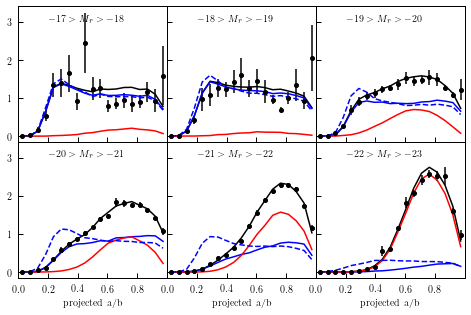

In [7]:
from astropy.table import Table
from make_mock import make_galaxy_sample

samples = ['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6']

fig, axes = plt.subplots(2, 3, figsize=(8.0,5.0), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)

axes = axes.flatten()
for i, sample in enumerate(samples):
    
    mag_lim = mag_lims[i]
    
    ax = axes[i]
    tt = Table.read('../data/'+sample+'_shapes.dat', format='ascii')
    ax.errorbar(tt['q'], tt['frequency'], tt['err'], fmt='o', ms=4, color='black')
    
    d = {'disk_shape_mu_1_centrals': t['col1'][i],
         'disk_shape_mu_2_centrals': t['col4'][i],
         'disk_shape_sigma_1_centrals': t['col7'][i],
         'disk_shape_sigma_2_centrals': t['col10'][i],
         'elliptical_shape_mu_1_centrals': t['col13'][i],
         'elliptical_shape_mu_2_centrals': t['col16'][i],
         'elliptical_shape_sigma_1_centrals': t['col19'][i],
         'elliptical_shape_sigma_2_centrals': t['col22'][i],
         'f_disk': t['col25'][i]}
    mock = make_galaxy_sample(mag_lim=mag_lim,**d)
    
    # measure shape distribution
    bins = np.linspace(0,1,20)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    mag_key = 'obs_Mag_r'
    mask = (mock[mag_key]<mag_lim) & (mock[mag_key]>(mag_lim-1.0))
    
    disks = mock['disk'] == True
    ellipticals = mock['elliptical'] == True
    
    x = mock['galaxy_projected_b_to_a']
    counts = np.histogram(x[mask], bins=bins)[0]
    counts = 1.0*counts/np.sum(mask)/np.diff(bins)
    ax.plot(bin_centers, counts, color='black')
    
    counts_1 = np.histogram(x[mask & disks], bins=bins)[0]
    counts_1 = 1.0*counts_1/np.sum(mask)/np.diff(bins)
    ax.plot(bin_centers, counts_1, color='blue')
    
    counts_2 = np.histogram(x[mask & ellipticals], bins=bins)[0]
    counts_2 = 1.0*counts_2/np.sum(mask)/np.diff(bins)
    ax.plot(bin_centers, counts_2, color='red')
    
    mag_key = 'Mag_r'
    mask = (mock[mag_key]<mag_lim) & (mock[mag_key]>(mag_lim-1.0))
    
    counts_11 = np.histogram(x[mask & disks], bins=bins)[0]
    counts_11 = 1.0*counts_11/np.sum(mask)/np.diff(bins)
    ax.plot(bin_centers, counts_11, '--', color='blue')

    
axes[0].text(0.2, 3, r'$-17>M_r>-18$')
axes[1].text(0.2, 3, r'$-18>M_r>-19$')
axes[2].text(0.2, 3, r'$-19>M_r>-20$')
axes[3].text(0.2, 3, r'$-20>M_r>-21$')
axes[3].set_xlabel('projected a/b')
axes[4].text(0.2, 3, r'$-21>M_r>-22$')
axes[4].set_xlabel('projected a/b')
axes[5].text(0.2, 3, r'$-22>M_r>-23$')
axes[5].set_xlabel('projected a/b')
axes[5].set_xticks([0,0.2,0.4,0.6,0.8])
axes[5].set_xlim([0,1])

plt.show()

fig.savefig('/Users/duncan/Desktop/model_fits.pdf', dpi=250)